# Homework Assignment 3 (Individual)

---

### <p style="text-align: right;"> &#9989; Jialin Qiu</p>


---
## Creating a natural selection model using ABMs and OOP

In this homework, we have two sections.

- **Part A: Git practice**
- **Part B: ABM + OOP: Simulating animal populations -- Natural selection and adaptation**

<img src="https://raw.githubusercontent.com/huichiayu/cmse_202_802/main/IMGs/rock_mice.jpg" border="0" align="center" width="600">
image found online.


### Goal for this homework assignment
By now, you have learned ABM and OOP through the assignments of assembling Zoo and Superbugs. Let's use those skills to build a simple fun model of natural selection. 

**This assignment is due roughly two weeks from now at 11:59 pm on Friday, March 31.** It should be uploaded into the "Homework Assignments" submission folder for Homework #3, as well as GitHub turn-in repo.  Submission instructions can be found at the end of the notebook. **The distribution of points can be found in the section headers**.


---
## Part 0: Upload this file to your Git repository to track your progress on your assignment (15 pt)

#### Note: This is different from previous assignments!

You will add this homework assignment to your GutHub repository you created for previous homework so that you can track your progress on the assignment and preserve the final version that you turn in. We also want you to get practice with **branching**, as that will be important and useful for your group projects. 

**&#9989; Do the following**:


1. Navigate to your `cmse202-s23-turnin` repository 
2. Create a new branch called `hw03_branch` and move into it. 
3. Create a new directory called `hw-03`.
4. Move this notebook into that **new directory**, then **add** and **commit** it. 
5. Finally, to test that everything is working, `git push` the file and new branch so they end up in your GitHub repository. 

**Important**: Make sure to add your Professor and TA as collaborators of this respository with "Read" access so that we can see your assignment (you should have done this in the previous homework assignment)

**Also**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the `cmse202-s23-turnin` repository inside the `hw-03` directory and `hw-03` branch that you just created.  Periodically, **you'll be asked to commit your changes and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It will be good to develop a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.



---

# A natural selection model
For this homework assignment, you will be building an Agent-Based Model (ABM) that simulates natural selection in action. You will build two classes for mice, which inhabit the world, and one class for a (predator) hawk. The mice have different fur color, which allows them to blend in better (or worse) with their environment. This model is (loosely) based on an actual case of natural selection involving the [Peppered Moth](https://en.wikipedia.org/wiki/Peppered_moth_evolution).

For this assignment, you will be working with an environment class, which will allow you to actually run your simulation. We've also provided you with a generic `Animal_Agent`, which you will use to build your own classes for the natural selection model. You will need to download the generic `Animal_Agent` class and `Environment` class. You can find them here:

- `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW3/Animal_Agent_Class.py`
- `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW3/Environment.py`

## 1. Building Up an Environment with Animal Agents



### 1.1 (5 Points)

Spend some time exploring the new classes a bit. **Write a few sentences giving a high-level description of how this model works. What are the different classes? What do they do? How can they be used to create an Agent-Based Model?**


This model has two classes named `Animal_Agent` and `Environment`. The `Animal_Agent` Class uses random, numpy, math, matplotlib.pyplot and itertools to represent an animal agent object, an autonomous agent that can interact with other agents. All these animal agents have attributes like age, age limit, sex, color, shape and so on. And accordind to the description of the class, predators can hunt prey, prey can procreate, and both predator and prey can move around and age. The `Environment` Class can show a whole environment where the animal agents interact with each other (preys and predators). We can add agent, set time, set board size and visualize the process. The output of the `Animal_Agent` turns into the input of the `Environment`, which creats an ABM that allows us to learn how the animal agents (preys and predators) behave and interact in the environment.

### 1.2 (15 Points)

Construct a new `Environment` object and a new `Animal_Agent` object. Specify that the `Animal_Agent` object is a female. Add the `Animal_Agent` object to the `Environment` object. Run the `simulation` method. You should see there's a bug in the code. **Fix the bug and explain what the cause was.**

In [17]:
#Write your code here
import Animal_Agent_Class
from Animal_Agent_Class import Animal_Agent
import Environment
from Environment import Environment

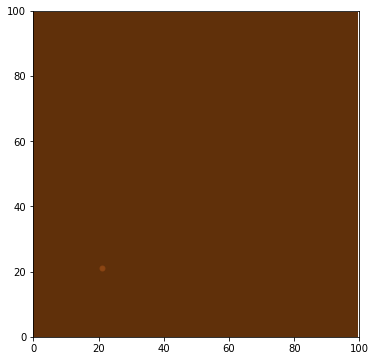

In [18]:
environment = Environment()
animal_1 = Animal_Agent(sex="F")
environment.add_agent(animal_1)
environment.simulate(5)

I fixed the bug bug here. The bug shows that TypeError: unsupported operand type(s) for -: 'list' and 'int', which means that a list and a integer are trying to minus. The TypeError also pointed out which line of the class caused this error. So I looked back at the `Environment` Class notebook. All the problem is from the procreat function under the simulate function. Because this is an Agent-Based Model, I looked back to the `Animal_Agent` Class to see the procreat function and found out that the procreat function needs three attributions that are self, all_agents and time. But in the simulation function under the `Environment` Class, the time is not behind all_agents. So I switched the order of these two in this function and also the simulate_plot_populations function below.

### 1.3 (5 Points)

**In the cell below, copy your `simulation` code from above and rerun it with the bug fixed to show how the animal runs around.** You should use the `set_allele()` method in the `Animal_Agent` class to randomly assign two alleles to your `Animal_Agent` object.


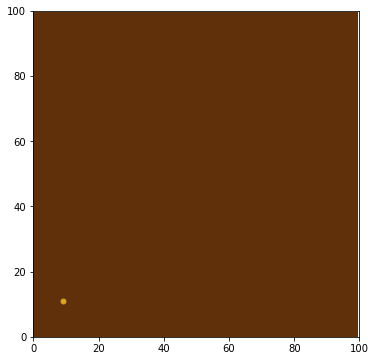

In [19]:
#Write your code here
animal_1.set_allele(1, 1)
environment.simulate(5)

### 1.4 (5 Points)

**Now add in a predator and let it evolve. Do you see the predator hunting the prey object?** Make sure to set the `ptype` to predator, and the `shape` and `color` to be something different from the prey you defined above (E.g., a shape of "P" and a color of "red".)

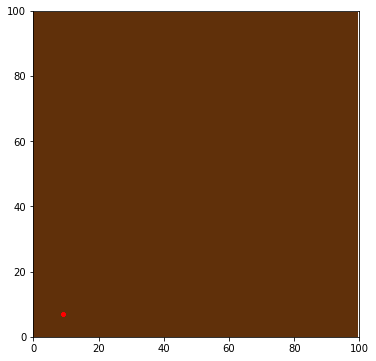

In [20]:
#Write your code here
predator = Animal_Agent(ptype="Predator", shape='P', color='red')

environment.add_agent(predator)
environment.simulate(50)

#Yes, I see. The red dot touched the yellow one, and then the yellow one disappeared.

### 1.5 (15 Points)

**Now add *multiple* predator and prey agents ($N > 1$ for both). Find a combination of $N_{\mathrm{Prey}}$ and $N_{\mathrm{Predator}}$ where the Prey can maintain a sustainable population (I.e., they aren't wiped out in the long run).**

- **NOTE 1:** Make sure you add both male and female Prey, so they can `Procreate`. 
- **NOTE 2:** We recommend using the `simulate_plot_populations()` method, so you can monitor the growth/decline of populations.

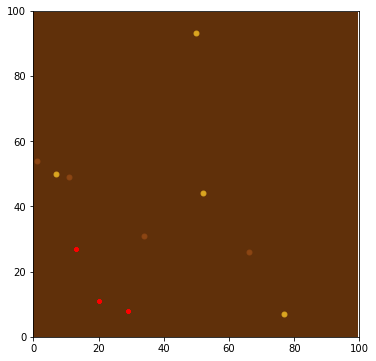

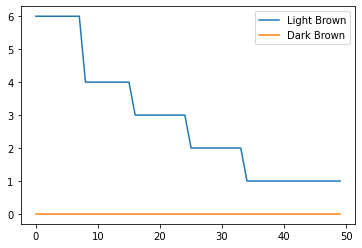

In [21]:
# Creat prey agents that are half males half femals
p1 = Animal_Agent(sex = 'F')
p1.set_allele(0, 0)
p2 = Animal_Agent(sex = 'M')
p2.set_allele(1, 1)
p3 = Animal_Agent(sex = 'F')
p3.set_allele(0, 0)
p4 = Animal_Agent(sex = 'M')
p4.set_allele(1, 1)
p5 = Animal_Agent(sex = 'F')
p5.set_allele(1, 1)
p6 = Animal_Agent(sex = 'M')
p6.set_allele(0, 1)
p7 = Animal_Agent(sex = 'F')
p7.set_allele(0, 0)
p8 = Animal_Agent(sex = 'M')
p8.set_allele(1, 1)
p9 = Animal_Agent(sex = 'F')
p9.set_allele(0, 0)
p0 = Animal_Agent(sex = 'M')
p0.set_allele(1, 1)

# Creat three predators
P1 = Animal_Agent(ptype = 'Predator', shape = 'P', color = 'red')
P2 = Animal_Agent(ptype = 'Predator', shape = 'P', color = 'red')
#P3 = Animal_Agent(ptype = 'Predator', shape = 'P', color = 'red')

# Add agents to the environment
environment.add_agent(p1)
environment.add_agent(p2)
environment.add_agent(p3)
environment.add_agent(p4)
environment.add_agent(p5)
environment.add_agent(p6)
environment.add_agent(p7)
environment.add_agent(p8)
environment.add_agent(p9)
environment.add_agent(p0)
environment.add_agent(P1)
environment.add_agent(P2)
#environment.add_agent(P3)

environment.simulate(50)
environment.simulate_plot_populations(50)

### 1.6 (5 Points)

**How does the population evolve over time? (I.e., is it linear? Periodic? etc.) What causes this shape? How does the population of light brown and dark brown prey differ (if at all)?**

The population evolves over time as periodic. The total time and the move steps causes this ship, because while the preys are moving, there are chance that they will be caught by the predators. The procreat function is used to have the new prey. There are peaks and valleys in population numbers. The population of light brown and dark brown prey have a great different based on the simulate_plot_populations function.

## 2. Refining the Model

For this part, we're going to use our generic `Animal_Agent`class to construct child classes that represent *specific* animal species for both our predator and prey animals. Specifically, we'll be making a `Mouse` child class for the prey and a `Hawk` child class for the predator. **We'll use these new child classes to run our natural selection model.**

### 2.1 (15 Points)

Create a new `Mouse` child class, using the `Animal_Agent` as the parent class. The `Mouse` class will largely be the same as the `Animal_Agent` class except for two details: 

1. **In the `set_allele` method, add a new class attribute called `catch_probability`. For the light-brown mice, set `catch_probability` to 0.95. For dark brown mice, set the `catch_probability` to 0.05.**
2. **Change the `Procreate` method so that they create new `Mouse` animal objects.**



In [56]:
#Write your code here
import random 
import numpy as np
import math
import matplotlib.pyplot as plt
import itertools

class Mouse(Animal_Agent):
    
    def __init__(self, xmax=100,ymax=100,ptype="Prey",sex="M",age_limit=50,catch_radius=10,mate_range=5,gestation=8,shape="o",color="saddlebrown",saturation_pop=150):
        self.x = random.randint(0, xmax)
        self.y = random.randint(0, ymax)
        self.age = 0 
        self.ptype = ptype
        self.age_limit = age_limit
        self.catch_radius = catch_radius
        self.xmax = xmax
        self.ymax = ymax
        self.sex = sex
        self.gestation = gestation
        self.last_litter_time = 1
        self.mate_range = mate_range 
        self.color = color
        self.shape = shape
        self.saturation_pop = saturation_pop
        self.is_caught = False
        
    def roaming(self,vx=7,vy=7): 
        dx = np.random.randint(-vx,vx)
        dy = np.random.randint(-vy,vy)

        if (self.x + dx > self.xmax) or (self.x + dx < 0):
            self.x -= dx
        else:
            self.x += dx

        if (self.y + dy > self.ymax) or (self.y + dy < 0):
            self.y -= dy
        else:
            self.y += dy
        
    def set_allele(self, alle_d, alle_m):
        self.alle_d = alle_d
        self.alle_m = alle_m
        if self.alle_d + self.alle_m >= 1:
            self.color = 'goldenrod'
            self.catch_probability = 0.95
        else:
            self.color = "saddlebrown" 
            self.catch_probability = 0.05
            
    def draw(self,ax):
        ax.scatter(self.x, self.y, s=24.0, c=self.color, marker=self.shape)   
    
    def aging(self):
        self.age += 1

    def check_if_dead(self):
        if self.age > self.age_limit:
            return True
        else:
            return False


    def get_distance(self,agent):
        return math.sqrt((self.x-agent.x)**2 + (self.y-agent.y)**2)
    
    def hunt(self,all_agents):
        for agent in all_agents:
            if (agent.ptype == "Prey") and (agent.age < agent.age_limit) and not (agent.is_caught):
                if self.get_distance(agent) < self.catch_radius:
                    agent.is_caught = True
                    return agent       
        return False
            
    def procreate(self,all_agents,time):
        child_list = []
        val = random.random()
        if (self.sex == 'F') and (np.mod(abs(time-self.last_litter_time),self.gestation) == 0):
            for agent in all_agents:
                if (agent.ptype=="Prey") and (agent.sex == "M") and (self.get_distance(agent) <= self.mate_range) and (val > (1.0/(1.0+np.exp(-len(all_agents)/self.saturation_pop)))):
                    child_num = int(np.random.normal(7,1))
                    for jj in range(child_num):
                        mom_a = self.alle_d
                        if np.random.randint(0,2) == 1:
                            mom_a = self.alle_m
                        dad_a = agent.alle_d
                        if np.random.randint(0,2) == 1:
                            dad_a = agent.alle_m               
                        child = Mouse(sex="F")
                        if np.random.randint(0,2) == 1:
                            child = Mouse(sex="M")
                        child.set_allele(dad_a,mom_a)
                        child_list.append(child)
                    self.last_litter_time = time
                    break

        return child_list

### 2.2 (10 Points)

Create a new `Hawk` child class, using the `Animal_Agent` as the parent class. The `Hawk` class will largely be the same as the `Animal_Agent` class except for one detail: **In the `hunt` method, incorporate the `catch_probability` of the predator, such that it is harder for a `Hawk` to catch a `Mouse` with a lower `catch_probability`.**

In [57]:
#Write your code here
class Hawk(Animal_Agent):
    def __init__(self, xmax=100,ymax=100,ptype="Predator",sex="M",age_limit=50,catch_radius=10,mate_range=5,gestation=8,shape="o",color="saddlebrown",saturation_pop=150):
        self.x = random.randint(0, xmax)
        self.y = random.randint(0, ymax)
        self.age = 0 
        self.ptype = ptype
        self.age_limit = age_limit
        self.catch_radius = catch_radius
        self.xmax = xmax
        self.ymax = ymax
        self.sex = sex
        self.gestation = gestation
        self.last_litter_time = 1
        self.mate_range = mate_range 
        self.color = color
        self.shape = shape
        self.saturation_pop = saturation_pop
        self.is_caught = False
        
    def hunt(self,all_agents):
        for agent in all_agents:
            if (agent.ptype == "Prey") and (agent.age < agent.age_limit) and not (agent.is_caught):
                if (self.get_distance(agent) < self.catch_radius) and (np.random.random() < agent.catch_probability):
                    agent.is_caught = True
                    return agent      
        return False

### 2.3 (5 Points)

**Repeat problem 1.5, replacing the generic prey with the `Mice` animals, and the generic predators with the `Hawk` animals.**

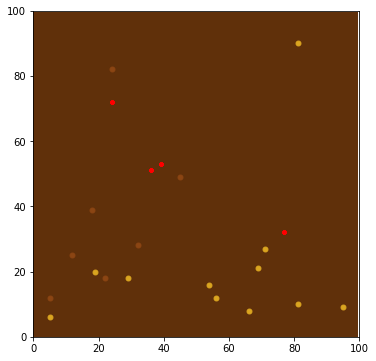

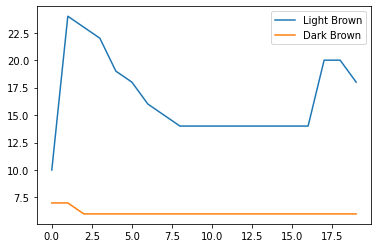

In [58]:
#Write your code here
# New Environment
NE = Environment()

p1 = Mouse(sex="F")
p1.set_allele(1,1)
p2 = Mouse(sex="M")
p2.set_allele(0,0)
p3 = Mouse(sex="F")
p3.set_allele(1,1)
p4 = Mouse(sex="M")
p4.set_allele(0,0)
p5 = Mouse(sex="F")
p5.set_allele(1,1)
p6 = Mouse(sex = "M")
p6.set_allele(0,0)
p7 = Mouse(sex="F")
p7.set_allele(1,1)
p8 = Mouse(sex="M")
p8.set_allele(0,0)
p9 = Mouse(sex="F")
p9.set_allele(1,1)
p10 = Mouse(sex="M")
p10.set_allele(0,0)
p11 = Mouse(sex="F")
p11.set_allele(1,1)
p12 = Mouse(sex="M")
p12.set_allele(0,0)
p13 = Mouse(sex="F")
p13.set_allele(1,1)
p14 = Mouse(sex="M")
p14.set_allele(0,0)
p15 = Mouse(sex="F")
p15.set_allele(1,1)
p16 = Mouse(sex="M")
p16.set_allele(0,0)

h1 = Hawk(ptype = 'Predator', shape = 'P', color = 'red')
h2 = Hawk(ptype = 'Predator', shape = 'P', color = 'red')
h3 = Hawk(ptype = 'Predator', shape = 'P', color = 'red')
h4 = Hawk(ptype = 'Predator', shape = 'P', color = 'red')

NE.add_agent(p1)
NE.add_agent(p2)
NE.add_agent(p3)
NE.add_agent(p4)
NE.add_agent(p5)
NE.add_agent(p6)
NE.add_agent(p7)
NE.add_agent(p8)
NE.add_agent(p9)
NE.add_agent(p10)
NE.add_agent(p11)
NE.add_agent(p12)
NE.add_agent(p13)
NE.add_agent(p14)
NE.add_agent(p15)
NE.add_agent(p16)
NE.add_agent(h1)
NE.add_agent(h2)
NE.add_agent(h3)
NE.add_agent(h4)

NE.simulate(20)
NE.simulate_plot_populations(20)

### 2.4 (5 Points)

**Describe the differences between your results using the `Hawk` and `Mouse` class and the results from part 1.5. If and how does this model capture the effects of natural selection?**

In this section, my result can show the rise in the population. In the `Mouse` class, we reset the caught possibility of the light brown mouse and dark brown mouse, which means that it's easier for hawks to catch light brown mouse than dark brown mouse. The amount of the dark brown mouse doesn't change significantly because their color is closer to the nature, which provides them the cover avoid being caught by the hawks. This model captures the effects of natural selection by representing the evolution of mice of different colors in the environment of survival in the wild. Because darker fur is less likely to be detected, dark brown mice have a greater chance of survival and, in turn, more dark brown mice will reproduce in the next generation. So repeatedly, natural selection has preserved this stable gene.

---
### &#128721; STOP
**Pause to commit your changes and push to your Git repository!**

## Git push, and then merge your `hw03_branch` into your `main` branch.